In [87]:
import json
import os
import math
import librosa
import pandas as pd
import random
import numpy as np
from tqdm import tqdm

In [69]:
DATASET_PATH = "edaicwoz/wav"
JSON_PATH = "data_10.json"
SAMPLE_RATE = 16000
SEGMENT_DUR = 8 * 60
SAMPLES_PER_TRACK = SAMPLE_RATE * SEGMENT_DUR

NUM_MFCC = 13
N_FFT = 2048
HOP_LENGTH = 512

In [10]:
train_labels_df = pd.read_csv("edaicwoz/train_split.csv")
test_labels_df = pd.read_csv("edaicwoz/test_split.csv")
val_labels_df = pd.read_csv("edaicwoz/dev_split.csv")

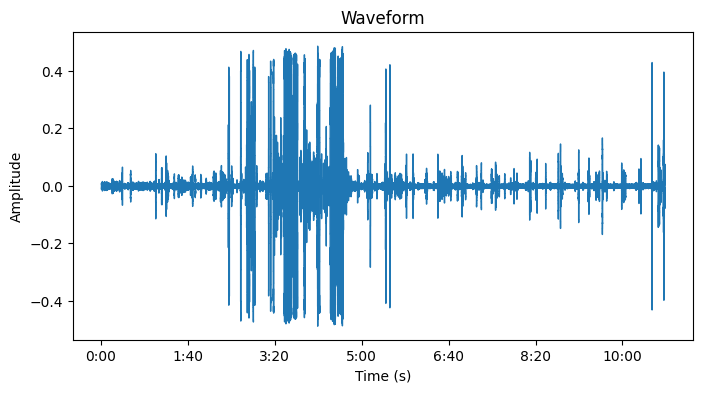

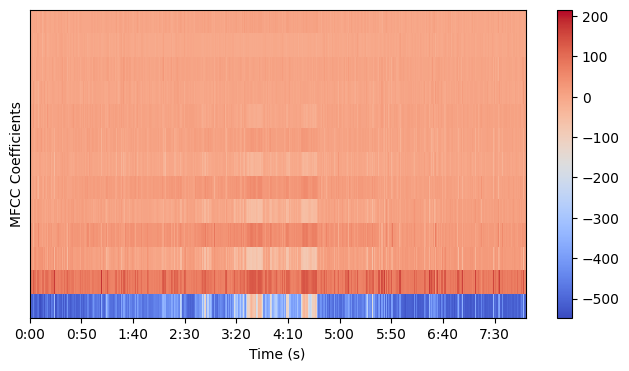

In [18]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_audio_mfcc(file_path):
    y, sr = librosa.load(file_path)

    plt.figure(figsize=(8, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    mfccs = librosa.feature.mfcc(y=y[:sr*480], sr=sr, n_mfcc=13)

    plt.figure(figsize=(8, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficients')
    plt.show()

audio_file_path = 'edaicwoz/wav/300_AUDIO.wav'  # Replace with the actual path to your audio file
plot_audio_mfcc(audio_file_path)

In [112]:
out_path = "MFCCs_1030"

for i, (dirpath, dirnames, filenames) in enumerate(os.walk(DATASET_PATH)):
    for file in filenames:
        sample_id = file.split("_")[0]
        file_path = dirpath + "/" + sample_id + "_AUDIO.wav"
        signal, _ = librosa.load(file_path, sr=SAMPLE_RATE)

        sample_amount = 10
        if int(sample_id) in train_labels_df["Participant_ID"].values:
            sample_amount = 10 if train_labels_df[train_labels_df["Participant_ID"] == int(sample_id)]["PHQ_Binary"].item() == 0 else 30
        elif int(sample_id) in val_labels_df["Participant_ID"].values:
            sample_amount = 10 if val_labels_df[val_labels_df["Participant_ID"] == int(sample_id)]["PHQ_Binary"].item() == 0 else 30
        else:
            sample_amount = 10
            
        for i in range(sample_amount):
            if (len(signal) > SAMPLE_RATE * SEGMENT_DUR): # discarding 357, 360
                start = random.randint(0, len(signal) - SAMPLE_RATE * SEGMENT_DUR)
                end = start + SAMPLE_RATE * SEGMENT_DUR

                mfcc = librosa.feature.mfcc(y=signal[start:end], sr = SAMPLE_RATE, n_mfcc=NUM_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH)
                
                out_file_dir = out_path + "/" + sample_id
                out_file_path = out_file_dir + "/" + sample_id + "_MFCC_" + str(i) + ".npy"
                os.makedirs(out_file_dir, exist_ok=True)
                np.save(out_file_path, mfcc)